# Part 1 - MLP

### Imports

In [601]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import warnings

warnings.filterwarnings("ignore", module="matplotlib")
%matplotlib inline

In [560]:
# split, test and train
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### There are 50,000 (3-channel) color 32x32 images

In [561]:
x_train.shape

(50000, 32, 32, 3)

In [562]:
y_train.shape

(50000, 1)

### Each image is 1 of 10 possible classes

In [563]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [564]:
# one image
x_train[0].shape

(32, 32, 3)

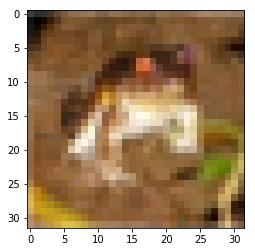

In [565]:
plt.imshow(x_train[0])

### Normalize all values between 0 and 1

In [566]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [567]:
# before normalization
x_train[0][:,0,0]

array([ 59,  16,  25,  33,  50,  71,  97, 115, 137, 154, 154, 145, 142,
       158, 145, 148, 149, 147, 152, 145, 143, 143, 141, 143, 149, 172,
       202, 216, 220, 208, 180, 177], dtype=uint8)

In [568]:
# after normalization
x_train_norm[0][:,0,0]

array([0.23137255, 0.0627451 , 0.09803922, 0.12941176, 0.19607843,
       0.27843137, 0.38039216, 0.45098039, 0.5372549 , 0.60392157,
       0.60392157, 0.56862745, 0.55686275, 0.61960784, 0.56862745,
       0.58039216, 0.58431373, 0.57647059, 0.59607843, 0.56862745,
       0.56078431, 0.56078431, 0.55294118, 0.56078431, 0.58431373,
       0.6745098 , 0.79215686, 0.84705882, 0.8627451 , 0.81568627,
       0.70588235, 0.69411765])

### Get the total classes

In [569]:
num_classes = len(np.unique(y_train))
num_classes

10

### Turn the labels into bit vectors

In [570]:
y_train_encode = keras.utils.to_categorical(y_train, num_classes)
y_test_encode = keras.utils.to_categorical(y_test, num_classes)

In [571]:
# before
y_train[0]

array([6], dtype=uint8)

In [572]:
# after
y_train_encode[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

### Split into train and validation sets

In [573]:
(x_train_final, x_valid) = x_train_norm[5000:], x_train_norm[:5000]
(y_train_final, y_valid) = y_train_encode[5000:], y_train_encode[:5000]

In [574]:
# train set
x_train_final.shape

(45000, 32, 32, 3)

In [575]:
# validation set
x_valid.shape

(5000, 32, 32, 3)

In [576]:
# get the shape of a single image as a 3D tensor
input_shape = x_train_final.shape[1:]
input_shape

(32, 32, 3)

In [577]:
# the same image as a 0D tensor
np.product(input_shape)

3072

### Creating a fully connected multilayer perceptron with dropout

In [578]:
model = Sequential()
model.add(Flatten(input_shape = input_shape))       # (32, 32, 3) -> 3072
model.add(Dense(1000, activation='relu'))           # 3072        -> 1000
model.add(Dropout(0.2))                             # 1000        -> 1000
model.add(Dense(512, activation='relu'))            # 1000        -> 512
model.add(Dropout(0.2))                             # 512         -> 512
model.add(Dense(num_classes, activation='softmax')) # 512         -> 10

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


### Loss function, optimizer and metric

In [579]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### Creating a checkpoint class to save the best model during training

In [580]:
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

### Training the MLP

In [581]:
# verbose = 1
hist = model.fit(x_train_final, y_train_final, batch_size=32, epochs=1,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/1
44928/45000 [============================>.] - ETA: 0s - loss: 2.1897 - acc: 0.2654
Epoch 00001: val_loss improved from inf to 1.83052, saving model to MLP.weights.best.hdf5
45000/45000 [==============================] - 38s 851us/step - loss: 2.1892 - acc: 0.2656 - val_loss: 1.8305 - val_acc: 0.3380


In [582]:
# verbose = 2
hist = model.fit(x_train_final, y_train_final, batch_size=32, epochs=1,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/1

Epoch 00001: val_loss improved from 1.83052 to 1.75204, saving model to MLP.weights.best.hdf5
 - 36s - loss: 1.8541 - acc: 0.3343 - val_loss: 1.7520 - val_acc: 0.3652


In [583]:
# verbose = 3
hist = model.fit(x_train_final, y_train_final, batch_size=32, epochs=1,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=3, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/1

Epoch 00001: val_loss improved from 1.75204 to 1.70489, saving model to MLP.weights.best.hdf5


### Load weights from best model

In [584]:
model.load_weights('MLP.weights.best.hdf5')

### Get score from test set

In [585]:
score = model.evaluate(x_test_norm, y_test_encode, verbose=0)
score[1]

0.4003

# Part 2 - Basic CNN

### Use the same setup as above, just swap out the model

In [586]:
input_shape

(32, 32, 3)

In [587]:
m1 = Sequential()
m1.add(Conv2D(filters=4, kernel_size=3, padding='valid', activation='relu', input_shape=input_shape, name='a'))
m1.add(Flatten(name='b'))
m1.add(Dense(10, activation='softmax', name='c'))
m1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
a (Conv2D)                   (None, 30, 30, 4)         112       
_________________________________________________________________
b (Flatten)                  (None, 3600)              0         
_________________________________________________________________
c (Dense)                    (None, 10)                36010     
Total params: 36,122
Trainable params: 36,122
Non-trainable params: 0
_________________________________________________________________


In [588]:
def savefilters(layers, depth):
    epoch = []
    weights.append(epoch)
    n = layers[depth].get_weights()[0].shape[-1]
    for i in range(n):
        w = layers[depth].get_weights()[0][:,:,:,i]
        weights[-1].append(w)

class FilterCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        pass        
    def on_batch_end(self, batch, logs={}):
        pass
    def on_epoch_end(self, acc, loss):
        savefilters(self.model.layers, 0)
        
fc = FilterCallback()

In [589]:
# verbose = 1
weights = []

m1.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

hist = m1.fit(x_train_final, y_train_final, batch_size=32, epochs=5,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer, fc], 
          verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
44800/45000 [============================>.] - ETA: 0s - loss: 1.7496 - acc: 0.3847
Epoch 00001: val_loss improved from 1.70489 to 1.69508, saving model to MLP.weights.best.hdf5
45000/45000 [==============================] - 11s 248us/step - loss: 1.7494 - acc: 0.3847 - val_loss: 1.6951 - val_acc: 0.3908
Epoch 2/5
44864/45000 [============================>.] - ETA: 0s - loss: 1.5917 - acc: 0.4449
Epoch 00002: val_loss improved from 1.69508 to 1.64311, saving model to MLP.weights.best.hdf5
45000/45000 [==============================] - 9s 209us/step - loss: 1.5912 - acc: 0.4452 - val_loss: 1.6431 - val_acc: 0.4236
Epoch 3/5
44896/45000 [============================>.] - ETA: 0s - loss: 1.5396 - acc: 0.4619
Epoch 00003: val_loss improved from 1.64311 to 1.63043, saving model to MLP.weights.best.hdf5
45000/45000 [==============================] - 10s 222us/step - loss: 1.5399 - acc: 0.4617 - val_loss: 1.6304 - val_acc: 0.4282
Epoc

# Part 3 - Visualizing CNN Filters

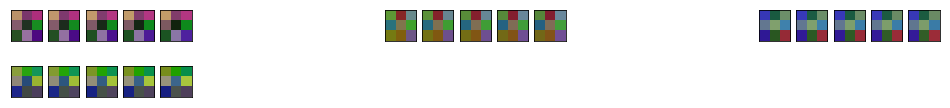

In [590]:
weights_t = np.array(list(zip(*weights)))

if weights_t.min() < 0:
    weights_t += abs(weights_t.min())

fig = plt.figure(figsize=(20,5))
for i, filters in enumerate(weights_t):
    for j, fltr in enumerate(filters):
        x = (i * len(filters) * 2) + j + 1
        ax = fig.add_subplot(5, 30, x, xticks=[], yticks=[])
        ax.imshow(fltr)

# Part 4 - Visualizing CNN output

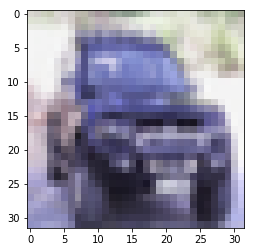

In [591]:
image = x_test_norm[9]
plt.imshow(image)

### Custom model using only layer 1

In [592]:
first_layer_model = Model(inputs=m1.input, outputs=m1.get_layer('a').output)
first_layer_model

In [593]:
pred = first_layer_model.predict(np.expand_dims(image, axis=0))

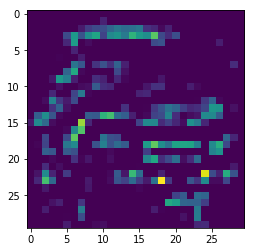

In [594]:
plt.imshow(pred[0][:,:,0])

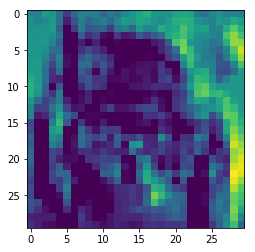

In [595]:
plt.imshow(pred[0][:,:,1])

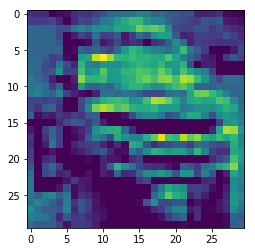

In [596]:
plt.imshow(pred[0][:,:,2])

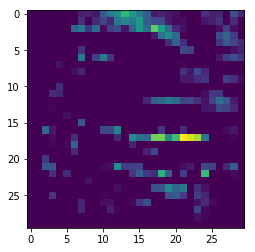

In [597]:
plt.imshow(pred[0][:,:,3])

# Part 5 - Keras Preprocessing

https://keras.io/preprocessing/image/

### Split data

In [598]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

### Preprocess definition

In [602]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

### Execute Preprocessing

In [603]:
datagen.fit(x_train)

### Define Model

In [609]:
m2 = Sequential()

m2.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=input_shape, name='a'))
m2.add(MaxPooling2D(pool_size=2, name='b'))
m2.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='c'))
m2.add(MaxPooling2D(pool_size=2, name='d'))
m2.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', name='e'))
m2.add(MaxPooling2D(pool_size=2, name='f'))
m2.add(Dropout(0.3, name='g'))
m2.add(Flatten(name='h'))
m2.add(Dense(500, activation='relu', name='i'))
m2.add(Dropout(0.4, name='j'))
m2.add(Dense(10, activation='softmax', name='k'))

m2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
a (Conv2D)                   (None, 32, 32, 16)        208       
_________________________________________________________________
b (MaxPooling2D)             (None, 16, 16, 16)        0         
_________________________________________________________________
c (Conv2D)                   (None, 16, 16, 32)        2080      
_________________________________________________________________
d (MaxPooling2D)             (None, 8, 8, 32)          0         
_________________________________________________________________
e (Conv2D)                   (None, 8, 8, 64)          8256      
_________________________________________________________________
f (MaxPooling2D)             (None, 4, 4, 64)          0         
_________________________________________________________________
g (Dropout)                  (None, 4, 4, 64)          0         
__________

### Compile Model

In [610]:
m2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train model using preprocessed images

In [612]:
m2.fit_generator(datagen.flow(x_train, y_train, batch_size=32), steps_per_epoch=len(x_train)/32, epochs=3)

Epoch 1/3
1563/1562 [==============================] - 30s 19ms/step - loss: 1.6723 - acc: 0.3898
Epoch 2/3
1563/1562 [==============================] - 31s 20ms/step - loss: 1.4376 - acc: 0.4805
Epoch 3/3
1563/1562 [==============================] - 31s 20ms/step - loss: 1.3743 - acc: 0.5100
